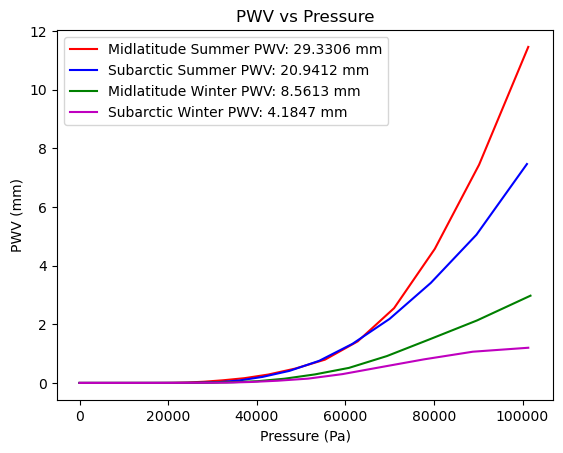

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from pyrtlib.climatology import AtmosphericProfiles as atmp

#from pyrtlib.tb_spectrum import TbCloudRTE

from pyrtlib.utils import ppmv2gkg, mr2rh

def PWV_array(rho,g,m_mix_kgkg,p_pa):
    """
    Calculate the precipitable water vapor from the mixing ratio.

    input:
        rho_w in kg/m^3
        g in m/s^2
        mass mixing ratio of water vapor in kg/kg
        pressure in Pa
        
    output:
        PWV(numpy.ndarray) in mm

    """
    PWV_arr = np.zeros(len(p_pa))
    PWV_sum = 0
    
    for i in range(len(p_pa) - 1):
        sum_m_P_rho = 0.5 * (m_mix_kgkg[i+1] + m_mix_kgkg[i]) * np.abs(p_pa[i+1] - p_pa[i])
        PWV_meter = sum_m_P_rho / (g*rho) # in m
        PWV_arr[i] = PWV_meter * 1000 # convert to mm
        PWV_sum += PWV_arr[i]

    return PWV_arr, PWV_sum

atms = [atmp.MIDLATITUDE_SUMMER, atmp.SUBARCTIC_SUMMER, atmp.MIDLATITUDE_WINTER, atmp.SUBARCTIC_WINTER]
#atms = [atmp.MIDLATITUDE_SUMMER]
g = 9.8 # m/s^2
colors = ['r', 'b', 'g', 'm']
cnt = 0

for atm in atms:
    z, p, _, t, md = atmp.gl_atm(atm)
    md_H2O = md[:,atmp.H2O]

    p_pa = p*1e2 # convert to Pa

    m_mix_gkg = ppmv2gkg(md_H2O,atmp.H2O) # convert to g/kg
    m_mix_kgkg = m_mix_gkg * 1e-3 # convert to kg/kg (g/g?)

    rho_w_liq = 1000 #kg/m^3
    PWV_arr, PWV_sum = PWV_array(rho_w_liq,g,m_mix_kgkg,p_pa)

    plt.plot(p_pa,PWV_arr,label=atmp.atm_profiles()[atm]+ ' PWV: ' + str(np.round(PWV_sum,4)) + ' mm',
            color=colors[cnt] )
    
    plt.ylabel('PWV (mm)')
    plt.xlabel('Pressure (Pa)')
    
    plt.legend()
    plt.title('PWV vs Pressure')
    plt.grid()
    #save figure
    #plt.savefig('PWV_vs_Pressure_'+atmp.atm_profiles()[atm]+'.png')
    #plt.show()
    cnt += 1


